In [1]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from datetime import datetime
import sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Retrieve data
ticker = 'AAPL'
end_date = datetime.now().strftime('%Y-%m-%d')
data = yf.download(ticker, start='2020-01-01', end=end_date)

In [ ]:
# Create connection to sqlite
conn = sqlite3.connect(':memory:')

# Store data in table
data.to_sql('stock_prices', conn, if_exists='replace', index=True)

In [ ]:
# Retrieve data from sqlite
query = "SELECT* FROM stock_prices"
df = pd.read_sql(query, conn)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Normalize and standardize the 'close' prices
df['Close'] = StandardScaler().fit_transform(df[['Close']])

In [ ]:
# Train a linear regression model
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

df.head()

In [ ]:
# Create a line chart of the 'Close' price
plt.plot(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.title('Stock Close Price')
plt.legend()
plt.show()

In [2]:
stock = yf.Ticker("MSFT")
stock = stock.history(period='2y')


In [3]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-02 00:00:00-04:00,271.235888,273.093279,267.678379,270.076263,22754200,0.0,0.0
2022-08-03 00:00:00-04:00,271.982748,278.606397,271.835313,277.594177,23518900,0.0,0.0
2022-08-04 00:00:00-04:00,276.935742,278.901219,275.333903,278.753815,18098700,0.0,0.0
2022-08-05 00:00:00-04:00,274.331504,278.753828,273.869616,278.026611,16774600,0.0,0.0
2022-08-08 00:00:00-04:00,279.146889,280.984635,274.498554,275.481293,18739200,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-29 00:00:00-04:00,431.579987,432.149994,424.700012,426.730011,15125800,0.0,0.0
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600,0.0,0.0
2024-07-31 00:00:00-04:00,420.500000,421.779999,412.209991,418.350006,42891400,0.0,0.0


In [4]:
del stock['Dividends']
del stock['Stock Splits']

In [5]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-02 00:00:00-04:00,271.235888,273.093279,267.678379,270.076263,22754200
2022-08-03 00:00:00-04:00,271.982748,278.606397,271.835313,277.594177,23518900
2022-08-04 00:00:00-04:00,276.935742,278.901219,275.333903,278.753815,18098700
2022-08-05 00:00:00-04:00,274.331504,278.753828,273.869616,278.026611,16774600
2022-08-08 00:00:00-04:00,279.146889,280.984635,274.498554,275.481293,18739200
...,...,...,...,...,...
2024-07-29 00:00:00-04:00,431.579987,432.149994,424.700012,426.730011,15125800
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600
2024-07-31 00:00:00-04:00,420.500000,421.779999,412.209991,418.350006,42891400


<Axes: xlabel='Date'>

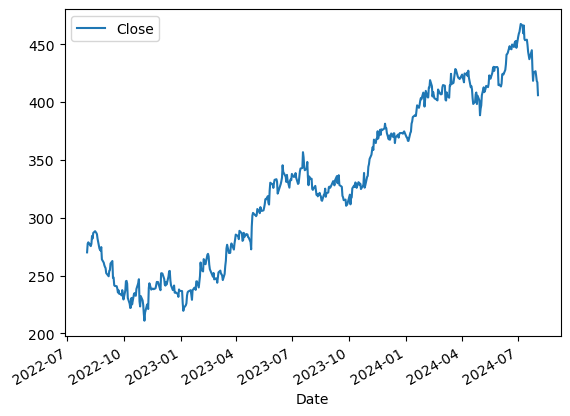

In [6]:
stock.plot.line(y="Close")

In [7]:
stock["Next Days Close"] = stock['Close'].shift(-1)

In [8]:
stock

,Open,High,Low,Close,Volume,Next Days Close
Date,,,,,,
2022-08-02 00:00:00-04:00,271.235888,273.093279,267.678379,270.076263,22754200,277.594177
2022-08-03 00:00:00-04:00,271.982748,278.606397,271.835313,277.594177,23518900,278.753815
2022-08-04 00:00:00-04:00,276.935742,278.901219,275.333903,278.753815,18098700,278.026611
2022-08-05 00:00:00-04:00,274.331504,278.753828,273.869616,278.026611,16774600,275.481293
2022-08-08 00:00:00-04:00,279.146889,280.984635,274.498554,275.481293,18739200,277.427155
...,...,...,...,...,...,...
2024-07-29 00:00:00-04:00,431.579987,432.149994,424.700012,426.730011,15125800,422.920013
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600,418.350006
2024-07-31 00:00:00-04:00,420.500000,421.779999,412.209991,418.350006,42891400,417.109985


In [9]:
stock['change'] = (stock['Next Days Close'] > stock['Close']).astype(int)

In [10]:
stock

,Open,High,Low,Close,Volume,Next Days Close,change
Date,,,,,,,
2022-08-02 00:00:00-04:00,271.235888,273.093279,267.678379,270.076263,22754200,277.594177,1
2022-08-03 00:00:00-04:00,271.982748,278.606397,271.835313,277.594177,23518900,278.753815,1
2022-08-04 00:00:00-04:00,276.935742,278.901219,275.333903,278.753815,18098700,278.026611,0
2022-08-05 00:00:00-04:00,274.331504,278.753828,273.869616,278.026611,16774600,275.481293,0
2022-08-08 00:00:00-04:00,279.146889,280.984635,274.498554,275.481293,18739200,277.427155,1
...,...,...,...,...,...,...,...
2024-07-29 00:00:00-04:00,431.579987,432.149994,424.700012,426.730011,15125800,422.920013,0
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600,418.350006,0
2024-07-31 00:00:00-04:00,420.500000,421.779999,412.209991,418.350006,42891400,417.109985,0


In [11]:
# Drop rows with NaN target values
stock = stock.dropna(subset=['Next Days Close', 'change'])

# Split our preprocessed data into our features and target arrays
y = stock['change']
X = stock.drop(columns=['change'])

# Preserve the index of the original DataFrame
original_index = X.index

In [12]:
#Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
# Rebuild X_test DataFrame to restore index information
X_test_df = pd.DataFrame(X_test, index=original_index[-len(X_test):], columns=X.columns)

In [14]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.4819 - loss: 0.7033
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.5074 - loss: 0.6925
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.5842 - loss: 0.6901
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.6271 - loss: 0.6898
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.6444 - loss: 0.6849
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.5785 - loss: 0.6802
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.5726 - loss: 0.6762
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.6503 - loss: 0.6755
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.6799 - loss: 0.6675
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.6309 - loss: 0.6641
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.6450 - loss: 0.6564
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_df, y_test)
print(f'Test Loss: {model_loss}, Test Accuracy: {model_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.8402 - loss: 0.3373
Test Loss: 0.35333967208862305, Test Accuracy: 0.8217821717262268


In [18]:
# Make predictions
predictions = model.predict(X_test_df).round().flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [19]:
# Create a DataFrame for predictions with the index of X_test_df
predictions_df = pd.DataFrame(predictions, index=X_test_df.index, columns=['Predictions'])

In [20]:
precision_score(y_test,predictions)

1.0

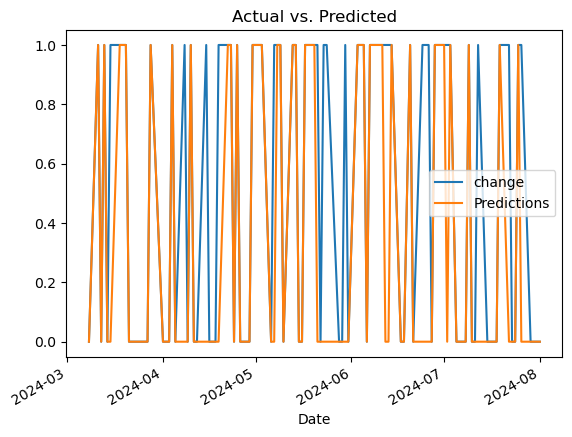

In [21]:
# Combine actual values and predictions
combined = pd.concat([y_test, predictions_df], axis=1)

# Plot the combined DataFrame
combined.plot(title='Actual vs. Predicted')
plt.show()

In [22]:
# Prepare latest data for prediction
latest_data = X_scaled[-1].reshape(1, -1)  # Take the most recent row
latest_data_df = pd.DataFrame(latest_data, columns=X.columns)

In [23]:
# Make prediction for the next day
next_day_prediction = model.predict(latest_data_df).round().flatten()[0]
print(f'Prediction for the next day: {"Stock Will Go Up" if next_day_prediction == 1 else "Stock Will Go Down"}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Prediction for the next day: Stock Will Go Down


[*********************100%%**********************]  10 of 10 completed


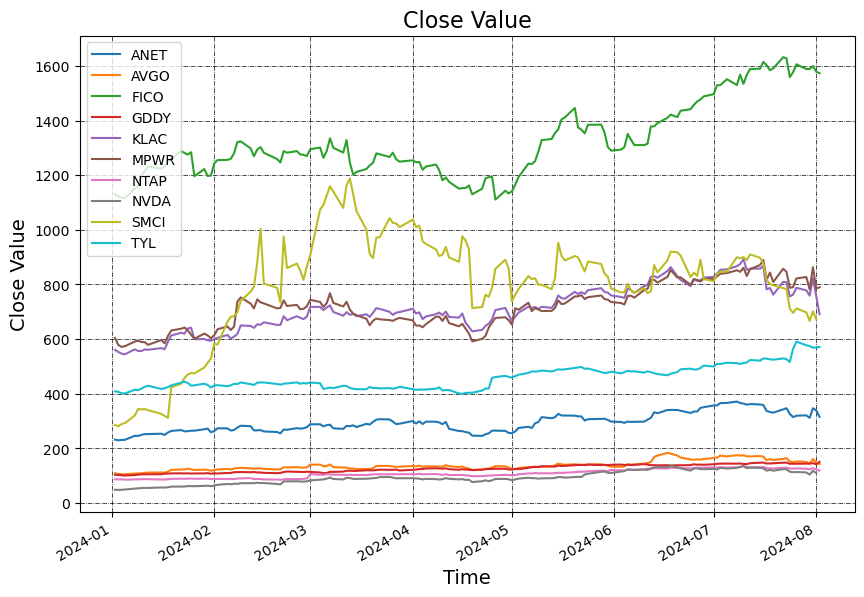

In [36]:
# Define the ticker list
import pandas as pd
tickers_list = ['SMCI', 'NVDA', 'ANET', 'NTAP', 'AVGO', 'KLAC', 'FICO', 'GDDY', 'MPWR', 'TYL']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2024-1-1')['Close']

# Plot all the close prices
((data.plot(figsize=(10, 7))))
plt.legend()
plt.title("Close Value", fontsize=16)

# Define the labels
plt.ylabel('Close Value', fontsize=14)
plt.xlabel('Time', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()